In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, spearmanr, pearsonr, chi2_contingency

# importieren der daten

df = pd.read_csv("ESS8e02.1_F1.csv", sep=",")
print(df)

In [33]:
# beschriftung der daten
df["gndr"] = pd.cut(df["gndr"], [0,1,2,9], labels=["Male", "Female", "No Answer"])

In [ ]:
# datensatz aus deutschland
df_de = df.loc[df.cntry == "DE"]
print(df_de)

In [ ]:
# datensatz aus deutschland und italien
df_de_it = df.loc[df.cntry.isin(["DE", "IT"])]
print(df_de_it)

In [ ]:
# hypothesentest a: Maenner haben mehr Glauben in die Polizei (trstplc, gender)

# aufbereitung der daten:
trust = df["trstplc"]
trust.drop(trust.loc[trust > 10].index, axis=0, inplace=True)
maenner = trust.loc[df["gndr"] == "Male"][:-3]
frauen = trust.loc[df["gndr"] == "Female"][:-3]

x = pd.crosstab(trust,df['gndr'], normalize='index')
x.plot.bar(rot=0)
plt.show()

# hypothesentest: 
s, p = mannwhitneyu(maenner, frauen)
print("Ergebnis: ", s)
print("P-Wert: ", p)

# Interpretation: 
# falsch! Frauen trauen der Polizei mehr!

In [ ]:
# hypothesentest b: Es besteht ein negativer Zusammenhang bei "mehr Strom aus nuklearer Energie" und "mehr Strom aus Solarenergie" (elgnuc, elgsun).

# aufbereitung der daten:

nuklear = df["elgnuc"]
nuklear.drop(nuklear.loc[nuklear > 5].index, axis=0, inplace=True)

solar = df["elgsun"]
solar.drop(solar.loc[solar > 5].index, axis=0, inplace=True)


ct = pd.crosstab(nuklear, solar, normalize='index').round(decimals = 4)
chi, p, dof, expected = chi2_contingency(ct)

sns.heatmap(ct, annot=False, cmap="YlGnBu")
sns.heatmap(ct, annot=ct, annot_kws={'va':'bottom'}, fmt="", cbar=False , cmap="YlGnBu")
sns.heatmap(ct, annot=expected, annot_kws={'va':'top'}, fmt=".2f", cbar=False, cmap="YlGnBu")
plt.show()

# darstellung der daten: 

# hypothesentest: 
corr, p = spearmanr(df['elgnuc'], df['elgsun'])
print("Korrelation: ", corr)
print("P-Wert: ", p)

# Interpretation: 
# Korrekt - spearmanr gibt uns einen negativen Wert aus und zeigt damit die negative Korrelation an

C:\Users\s8gre\AppData\Local\Temp\ipykernel_29664\1150896837.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  austria.drop(austria.loc[austria > 10].index, axis=0, inplace=True)
C:\Users\s8gre\AppData\Local\Temp\ipykernel_29664\1150896837.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hungary.drop(hungary.loc[hungary > 10].index, axis=0, inplace=True)


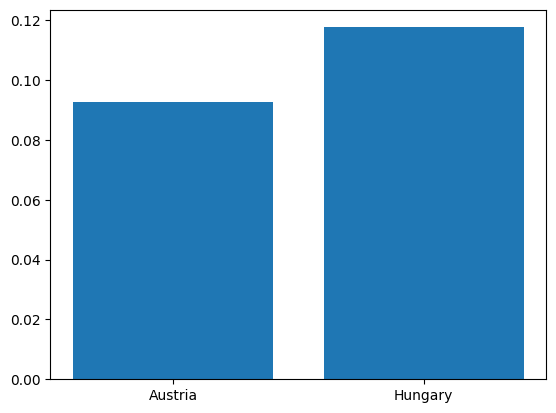

P-Value:  0.24227736746379908


In [117]:
# hypothesentest c: In ̈Oesterreich ist der Eindruck, dass sich der Klimawandel schlechter auf die Menschen auswirkt, staerker als in Ungarn (ccgdbd)

# aufbereitung der daten:
austria = df.loc[df.cntry == "AT"]["ccgdbd"]
austria.drop(austria.loc[austria > 10].index, axis=0, inplace=True)
hungary = df.loc[df.cntry == "HU"]["ccgdbd"]
hungary.drop(hungary.loc[hungary > 10].index, axis=0, inplace=True)

austria = austria.value_counts(normalize=True)
hungary = hungary.value_counts(normalize=True)

# darstellung der daten: 

plt.bar(['Austria', 'Hungary'], [pd.Series.median(austria), pd.Series.median(hungary)])
plt.show()

# hypothesentest: 
chi, p, dof, expected = chi2_contingency(pd.crosstab(austria, hungary))
print ("P-Value: ", p)

# Interpretation: 
# Korrekt!

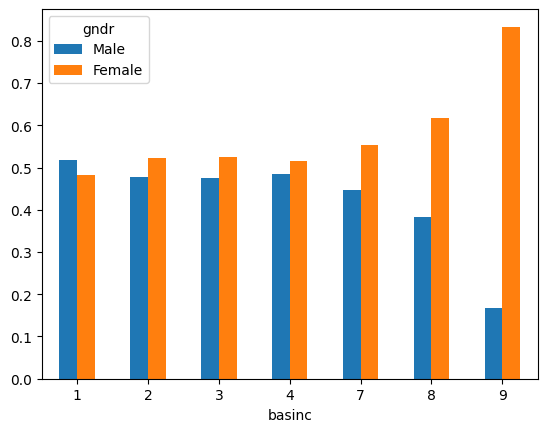

Chi: 0.3528942490519543
p: 0.9991974427828156
dof 6
expected [[0.42156945 0.57843055]
 [0.42156945 0.57843055]
 [0.42156945 0.57843055]
 [0.42156945 0.57843055]
 [0.42156945 0.57843055]
 [0.42156945 0.57843055]
 [0.42156945 0.57843055]]


In [109]:
# hypothesentest d: Frauen stimmen einem bedingungslosen Grundeinkommen eher zu (basinc).

# aufbereitung der daten:
income = df["basinc"]
maenner = trust.loc[df["gndr"] == "Male"]
frauen = trust.loc[df["gndr"] == "Female"]
man_women = df.loc[(df["gndr"] == "Female") | (df["gndr"] == "Male")]["gndr"]

# darstellung der daten: 
x = pd.crosstab(income, man_women, normalize='index')
x.plot.bar(rot=0)
plt.show()


# hypothesentest:
chi, p, dof, expected = chi2_contingency(x)
print ("P-Value:", p)

# Interpretation: 
# Korrekt!


In [ ]:
# hypothesentest e:

# aufbereitung der daten:

# darstellung der daten: 

# hypothesentest: 


In [ ]:
# hypothesentest f:

# aufbereitung der daten:

# darstellung der daten: 

# hypothesentest: 


In [ ]:
# interpretation der ergebnisse: 